In [1]:
#Import data from GitHub 
import pandas as pd
import requests
from io import StringIO

In [2]:
# loading in data 
url = "https://raw.githubusercontent.com/LadyKate7390/GREY_DSC650_SPR25/refs/heads/main/ai4i2020.csv"
response = requests.get(url)
data = pd.read_csv(StringIO(response.text))
if response.status_code == 200:
        data = pd.read_csv(StringIO(response.text))  
        print(data.head())
else:
        print(f"Failed to load data, status code: {response.status_code}")
          


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [3]:
#Verify data by looking at head
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [5]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
# Now that data is loaded in import all libraries need for project
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import joypy
import os
import glob
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

#Insights About Data:


In [7]:
# Check for missing values 
# drop UDI and Product ID columns

data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
#Reformating the data column labels to not contain special characters 
data.rename(columns={'Air temperature [K]':'air_temperature', 'Process temperature [K]':'process_temperature', 'Rotational speed [rpm]':
                     'rotational_speed','Torque [Nm]':'torque','Tool wear [min]':'tool_wear','Machine failure':'machine_failure'},inplace=True)

In [9]:
#Verify last step

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   air_temperature      10000 non-null  float64
 2   process_temperature  10000 non-null  float64
 3   rotational_speed     10000 non-null  int64  
 4   torque               10000 non-null  float64
 5   tool_wear            10000 non-null  int64  
 6   machine_failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

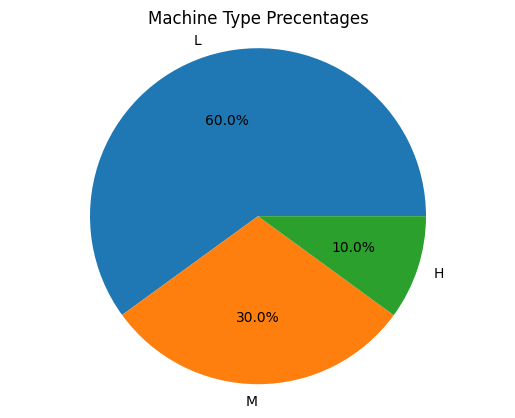

In [10]:
#Pie chart showing precentage of each type of machine Identified by L,M,N 
type_machine =data['Type'].value_counts()
labels = type_machine.index
sizes = type_machine.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Machine Type Precentages')
plt.axis('equal')
plt.show

This pie chart shows that the type "L" machine makes up the bulk of the data set. 
Note needs to be made of this as it could influence the model to weigh more toward type "L" failure instances and thereby bias the model.  A possible approach to considered will be using wieghts on machine_type when running models.  Further data exploration is needed. 

In [11]:
data_numeric = data.select_dtypes(include=[np.number])
data_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
air_temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
process_temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
rotational_speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
machine_failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [12]:
# overall descriptive information on categorical attributes
data_categorical = data.select_dtypes(include=[np.object_])
data_categorical.describe().transpose()

,count,unique,top,freq
Type,10000,3,L,6000


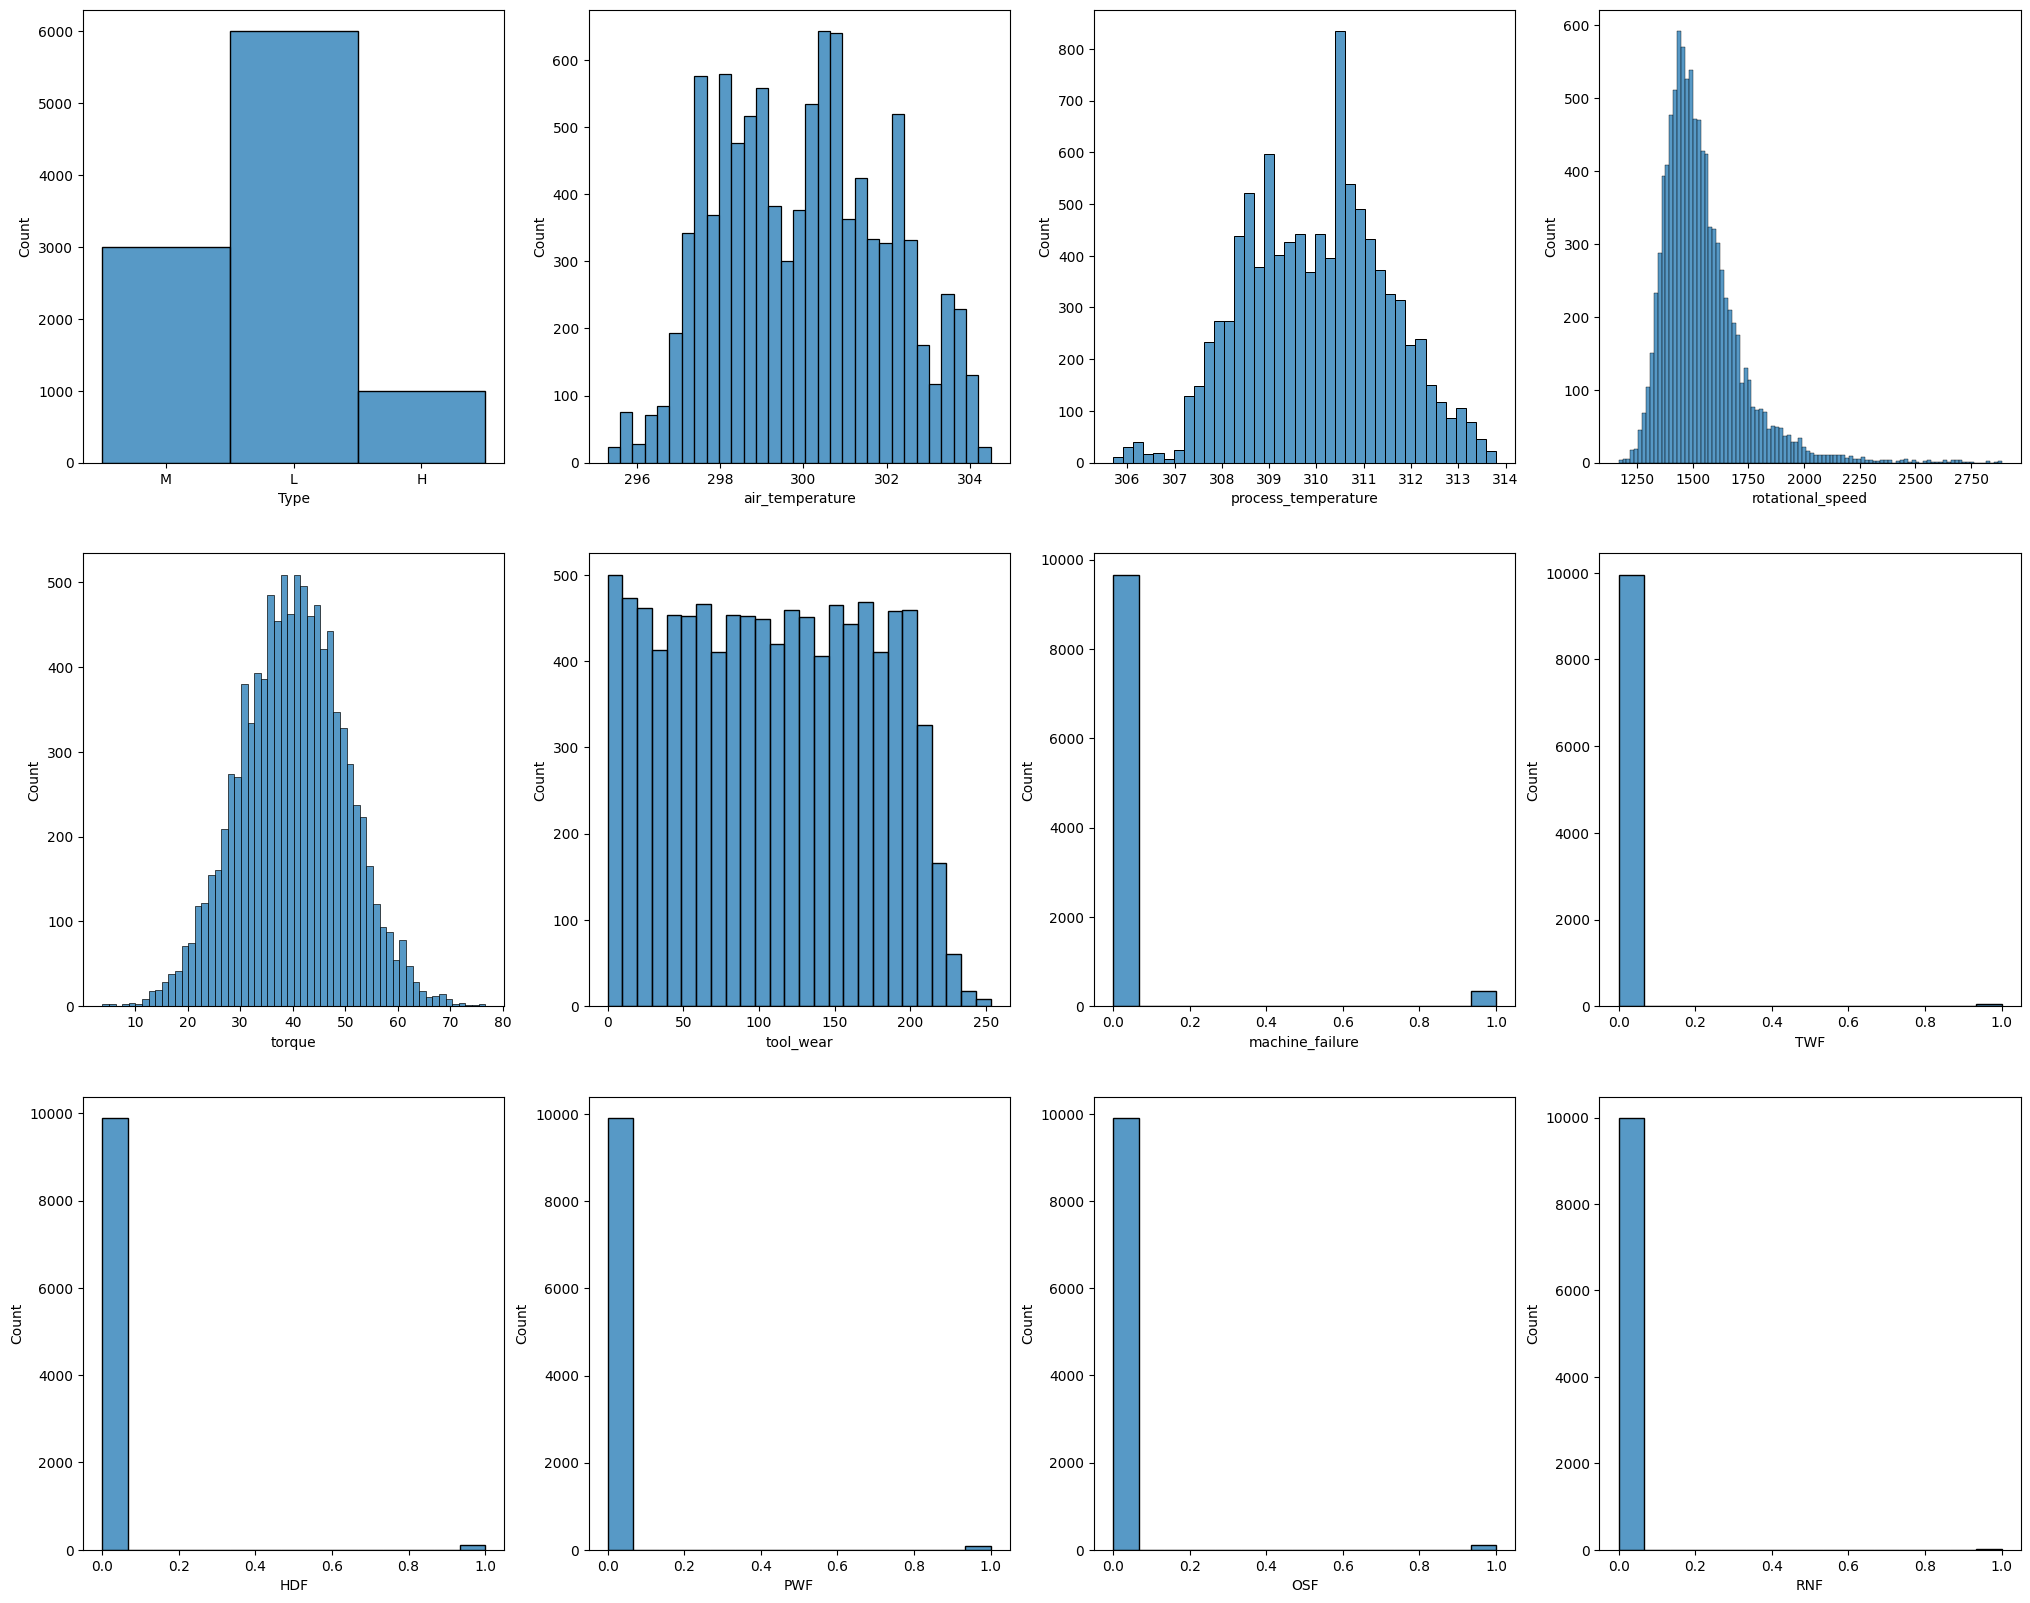

In [13]:
# Looking at the how each Feature is distrubted across the dataset using histograms
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

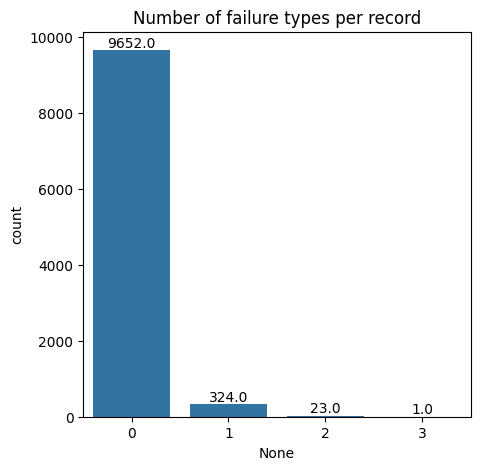

In [14]:
data_failures = data.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = data_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

This shows that there are several different failure modes recorded.  This needs to be combined to 
a binary system either failed or not. Binary classifiers are easier for modeling and given that the type of failure is irrelvant to predicting if it fails or not this should have no effect on the model.  Also looking at types of failure and the factors that drive them can be accomplished using data analysis versus ML. 

In [15]:
#Turning Failure types into a binary system
data['machine_failure'] = 0 #adding a new feature to dataset

data.loc[data['TWF'] == 1, 'machine_failure'] = 1
data.loc[data['HDF'] == 1, 'machine_failure'] = 1
data.loc[data['PWF'] == 1, 'machine_failure'] = 1
data.loc[data['OSF'] == 1, 'machine_failure'] = 1
data.loc[data['RNF'] == 1, 'machine_failure'] = 1

# drop individual failure types
data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

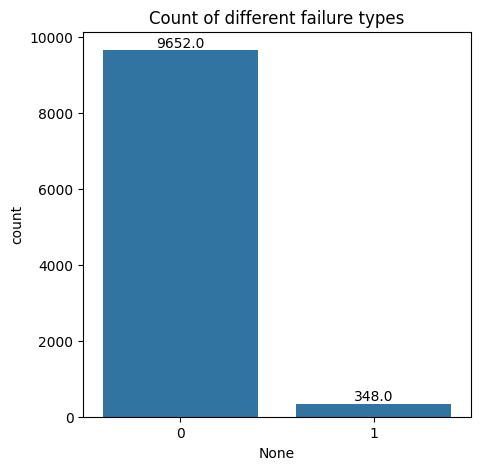

In [16]:
failure_types = data.loc[:, ['machine_failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

# Handling data issues and making new features 
String characters are not condusive of using in modeling and as we have unique leters per type of macing those will be changed into numeric values L=0, M=2 and H=1. All numbers will be converted to floats to prevent issues between having to different number types in the data set.  Additional some data can be combined into a new feature "force" by combing torque and rotational speed.

In [17]:
#New feature power
data['power'] = data[['rotational_speed', 'torque']].product(axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   air_temperature      10000 non-null  float64
 2   process_temperature  10000 non-null  float64
 3   rotational_speed     10000 non-null  int64  
 4   torque               10000 non-null  float64
 5   tool_wear            10000 non-null  int64  
 6   machine_failure      10000 non-null  int64  
 7   power                10000 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 625.1+ KB


In [19]:
dfn = data
dfn['Type'].replace({'L'}, 0, inplace=True)
dfn['Type'].replace({'M'}, 2, inplace=True)
dfn['Type'].replace({'H'}, 1, inplace=True)
dfn.head()

/var/folders/lw/vmbvrc855dqff2_jwv62tbs40000gn/T/ipykernel_94312/1538594845.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/lw/vmbvrc855dqff2_jwv62tbs40000gn/T/ipykernel_94312/1538594845.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,power
0,2,298.1,308.6,1551,42.8,0,0,66382.8
1,0,298.2,308.7,1408,46.3,3,0,65190.4
2,0,298.1,308.5,1498,49.4,5,0,74001.2
3,0,298.2,308.6,1433,39.5,7,0,56603.5
4,0,298.2,308.7,1408,40.0,9,0,56320.0


In [20]:
for column in dfn.columns:
    dfn[column] = dfn[column].astype(float)

In [21]:
print(dfn.shape)
dfn.dtypes

(10000, 8)


Type                   float64
air_temperature        float64
process_temperature    float64
rotational_speed       float64
torque                 float64
tool_wear              float64
machine_failure        float64
power                  float64
dtype: object

In [22]:
#Normalizing and handling outliers 
#exclude these first
excl_col = ['Type', 'machine_failure']

dfn.dtypes

Type                   float64
air_temperature        float64
process_temperature    float64
rotational_speed       float64
torque                 float64
tool_wear              float64
machine_failure        float64
power                  float64
dtype: object

In [23]:
#looking for and then dealing with NaN values 
df=dfn
df.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,power
0,2.0,298.1,308.6,1551.0,42.8,0.0,0.0,66382.8
1,0.0,298.2,308.7,1408.0,46.3,3.0,0.0,65190.4
2,0.0,298.1,308.5,1498.0,49.4,5.0,0.0,74001.2
3,0.0,298.2,308.6,1433.0,39.5,7.0,0.0,56603.5
4,0.0,298.2,308.7,1408.0,40.0,9.0,0.0,56320.0


In [24]:
def cap_outliers_iqr(data, column):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] <= lower_bound) | (df[col] >= upper_bound)]
        return data
for col in df.columns:
    if col not in excl_col:
        cap_outliers_iqr
    
   
df.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,power
0,2.0,298.1,308.6,1551.0,42.8,0.0,0.0,66382.8
1,0.0,298.2,308.7,1408.0,46.3,3.0,0.0,65190.4
2,0.0,298.1,308.5,1498.0,49.4,5.0,0.0,74001.2
3,0.0,298.2,308.6,1433.0,39.5,7.0,0.0,56603.5
4,0.0,298.2,308.7,1408.0,40.0,9.0,0.0,56320.0


In [25]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excl_col:
        # Normalize the values in the column
        df[col] = zscore(df[col])
df.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,power
0,2.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.629443
1,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,0.512456
2,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.376889
3,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,-0.330009
4,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,-0.357824


In [26]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)
df.shape

(9922, 8)

<Axes: >

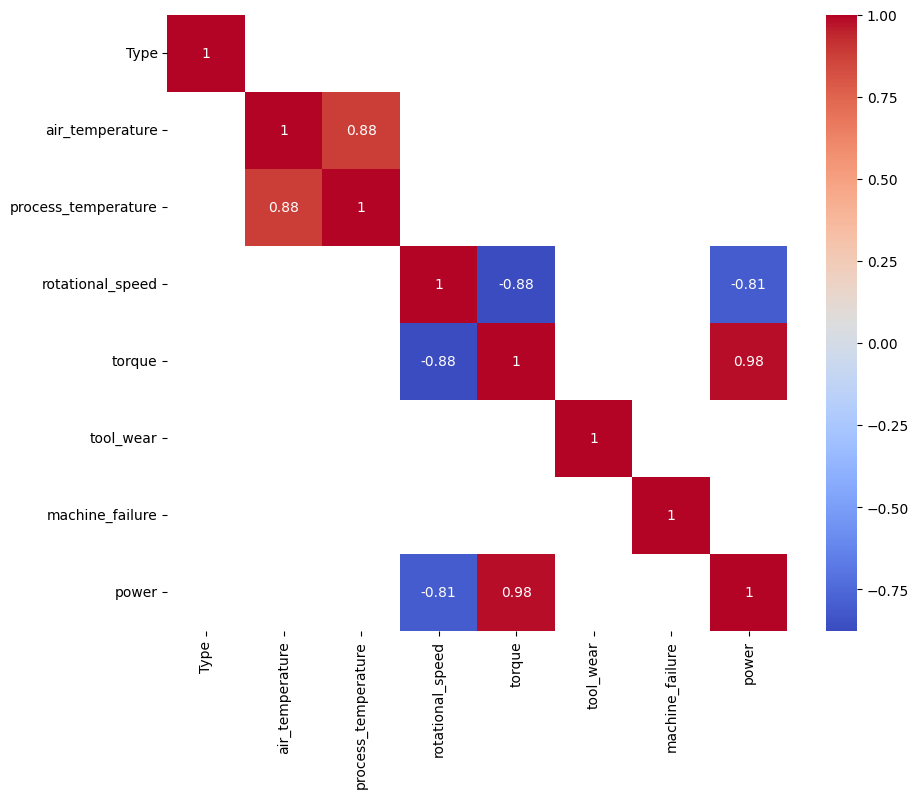

In [27]:
# Finding strong correlations using a correlation matrix 
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize= (10,8))
sns.heatmap(dfn.corr(), cmap="coolwarm", annot= True, mask=matrix)

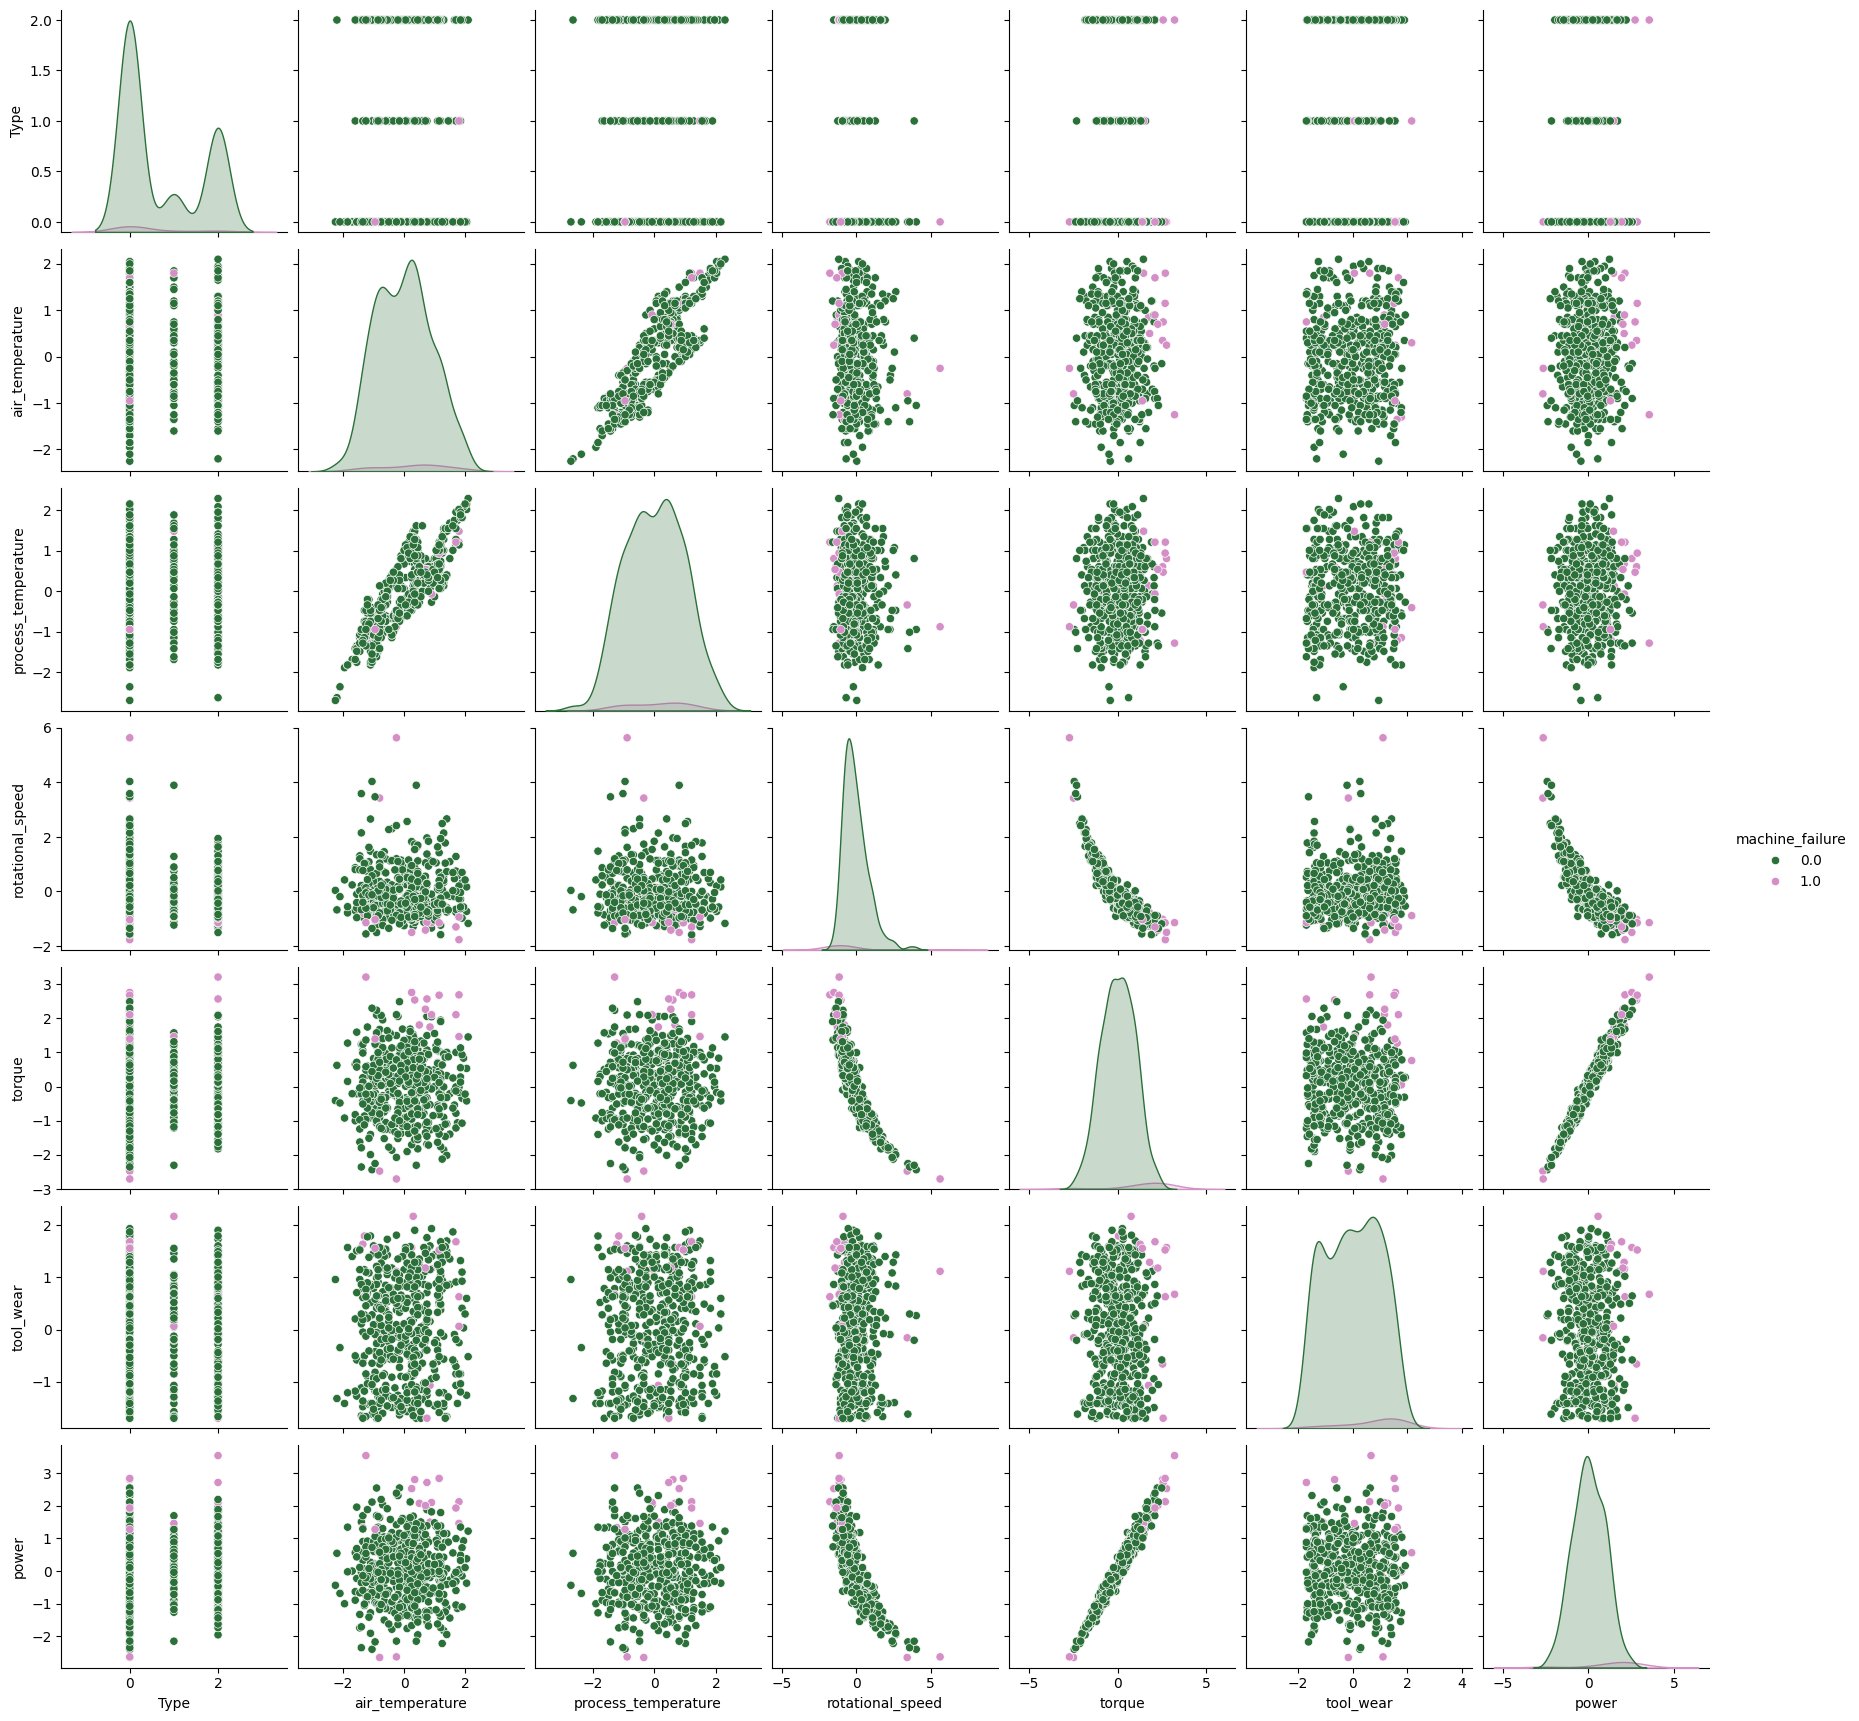

In [28]:
# Scatter plots showing relationship to machine flaiure and other attribures 

sns.pairplot(df.sample(frac=0.05), hue='machine_failure',palette= "cubehelix")

# Prepring for model and featuree engineering 
Now that the data has been sorted into more useable form and explored it is time to start looking at the models to be used. The correlation matrix will be used to choose feature for using the elbow method to determine the possible oprimal clusters.

In [29]:
df.dtypes

Type                   float64
air_temperature        float64
process_temperature    float64
rotational_speed       float64
torque                 float64
tool_wear              float64
machine_failure        float64
power                  float64
dtype: object

In [30]:
# Features used for cluseter
X =df[["air_temperature", "process_temperature", "rotational_speed", "torque", "power"]]

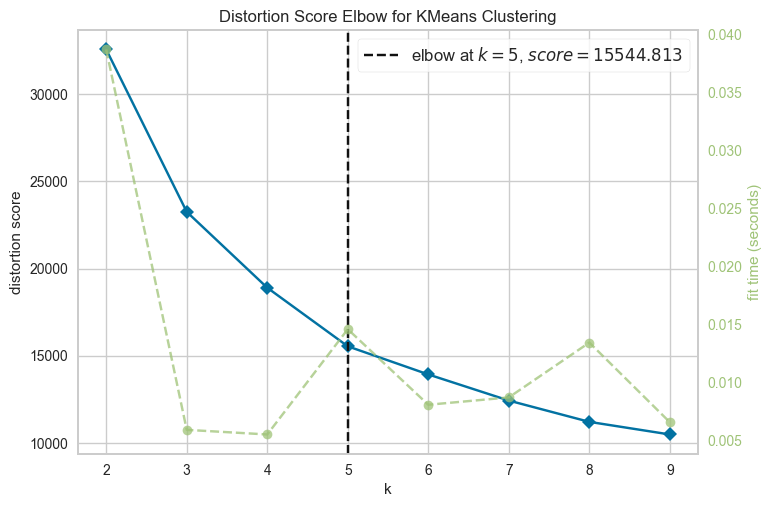

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# K-means clustering
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10)) # it turns out that k = 4 is the optimal number of clusters 

visualizer.fit(X)
visualizer.show()

This graph shows that the optimal kluster is 5 for the given inputed features. The next steps are to look at Hierachical clustering and the plot the silhoutes coefficients from here we will get the silhoute score and then move into modeling and scoring the models to find the best one.  

In [32]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

dfn["kmeans_cluster"] = kmeans.predict(X)

In [33]:
# Clustering and sihoultes coefficient 
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score:.3f}")


Silhouette Coefficient: 0.302


<Figure size 1000x800 with 0 Axes>

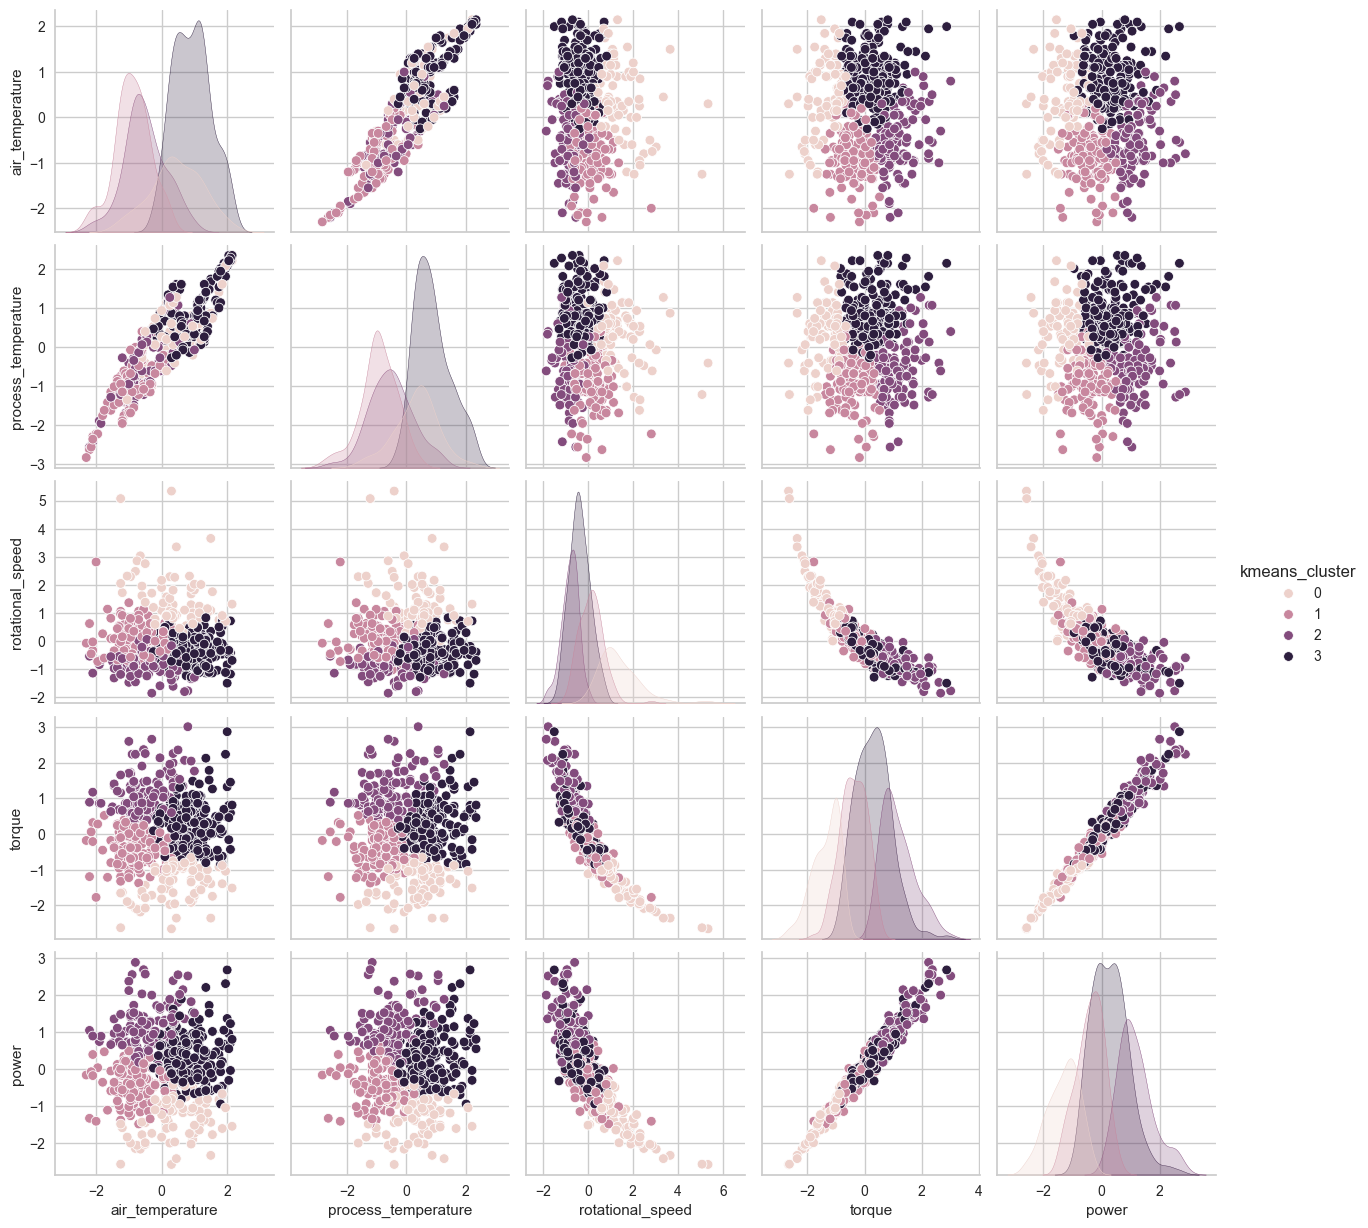

In [34]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["air_temperature", "process_temperature", "rotational_speed", "torque", "power"])
plt.show()


In [35]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(X)
dfn["hierarchical_cluster"] = model.labels_

<Figure size 1000x800 with 0 Axes>

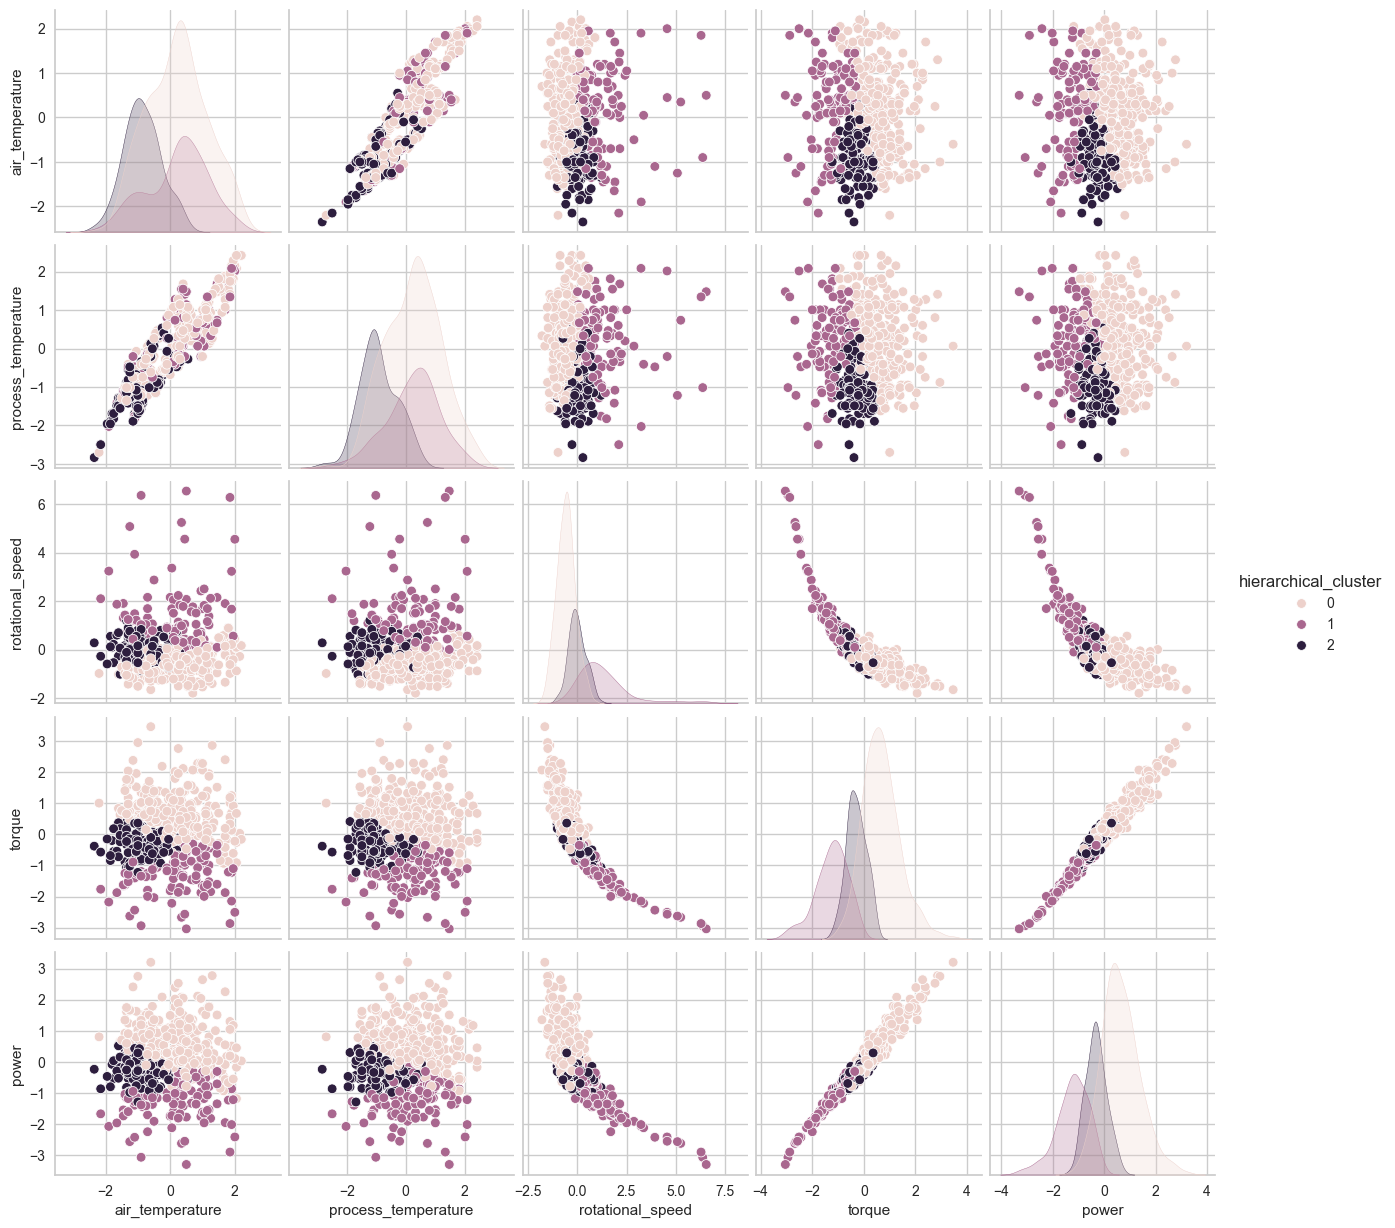

In [36]:
#Plot the Agglomerative 
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(dfn.sample(frac=0.05), hue="hierarchical_cluster", vars=["air_temperature", "process_temperature", "rotational_speed", "torque", "power"])
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, dfn["hierarchical_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.219


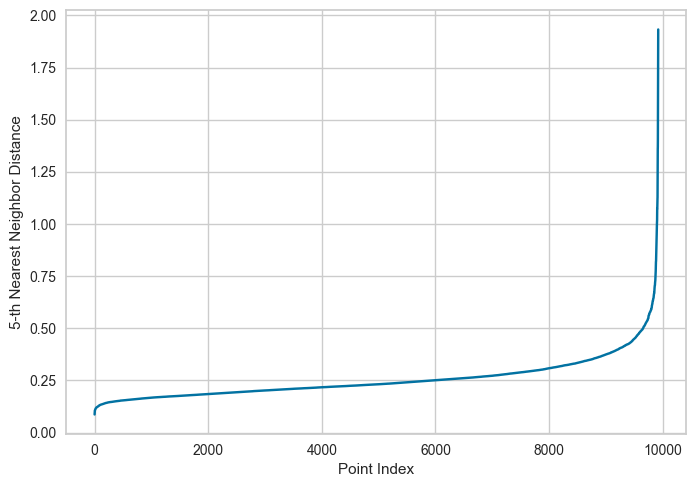

In [38]:
from sklearn.neighbors import NearestNeighbors

k = 5

# create the nearest neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# get the distances and indices of the kth nearest neighbors for each point
distances, indices = nn.kneighbors(X)

# get the kth nearest neighbor distances for each point
kth_distances = distances[:, k-1]

# sort the kth nearest neighbor distances
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()

In [39]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(X)

# obtain the cluster labels
df['dbscan_cluster'] = model.labels_
df.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,power,kmeans_cluster,hierarchical_cluster,dbscan_cluster
0,2.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.629443,1,2,0
1,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,0.512456,2,0,0
2,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.376889,2,0,0
3,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,-0.330009,1,2,0
4,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,-0.357824,1,2,0


In [40]:
df["dbscan_cluster"].nunique()

2

In [41]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, dfn["dbscan_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.597


In [42]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(X)
df["hierarchical_cluster"] = model.labels_

#Plotting the results of Agglomertive Cluster
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="hierarchical_cluster", vars=["air_temperature", "process_temperature", "rotational_speed", "torque", "power"])
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["dbscan_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.597


<Figure size 1000x800 with 0 Axes>

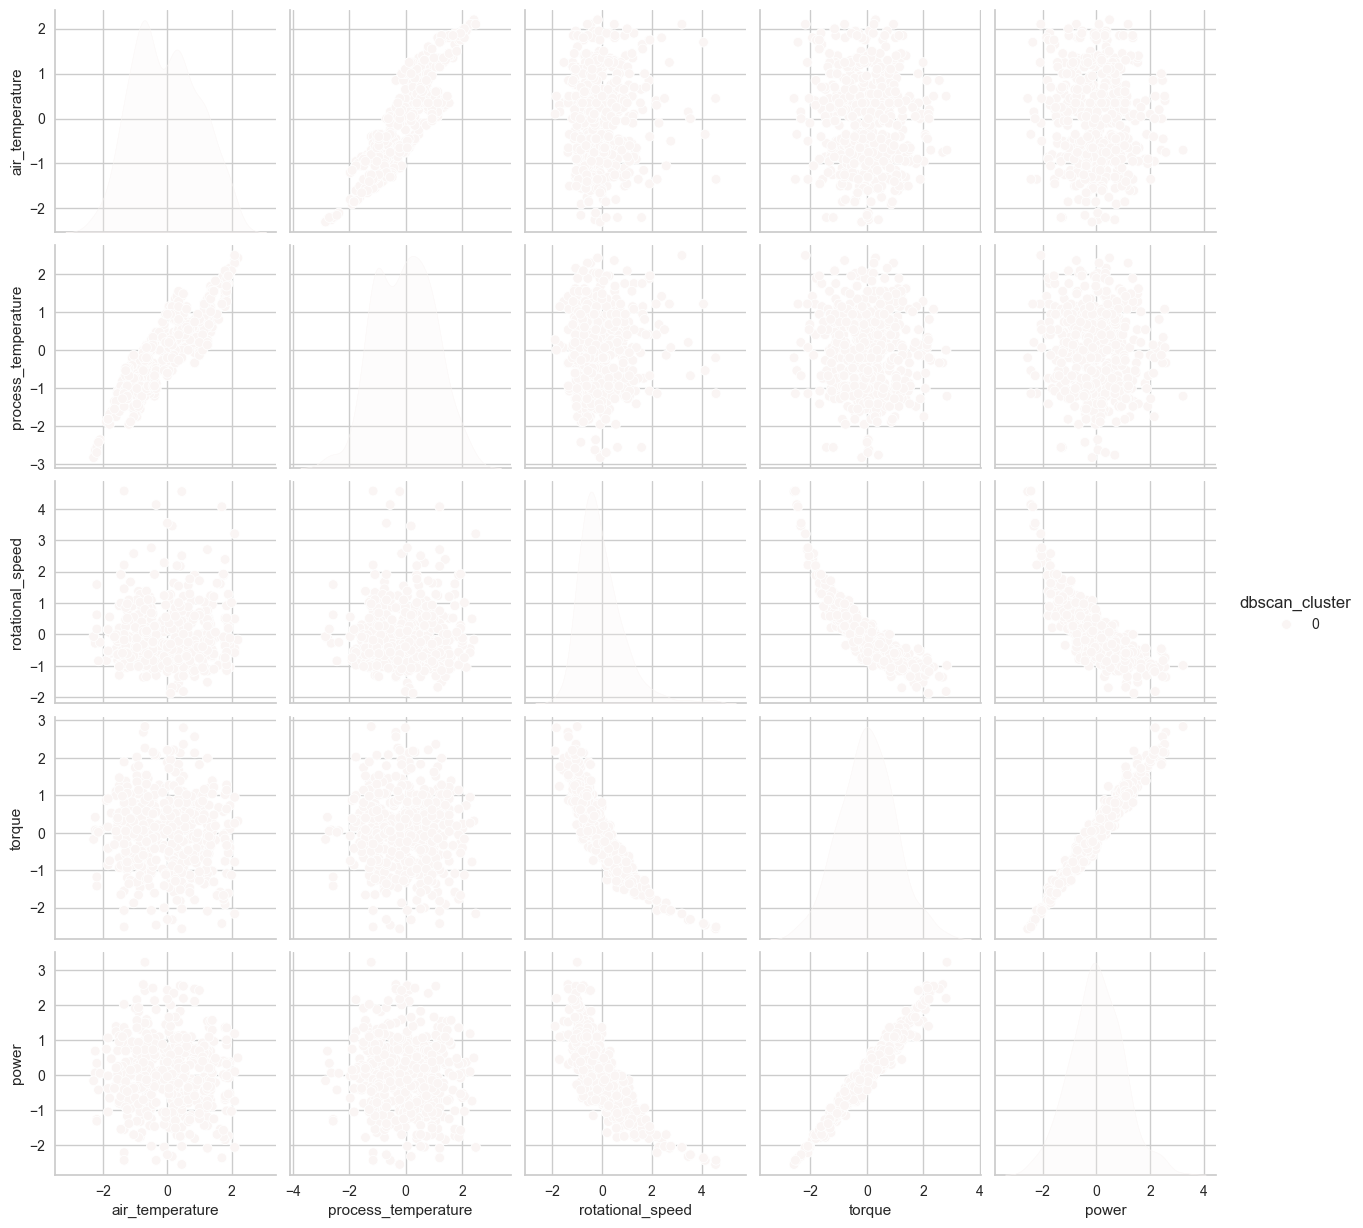

In [44]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="dbscan_cluster", palette="vlag", vars=["air_temperature", "process_temperature", "rotational_speed", "torque", "power"])
plt.show()

#Modeling 

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])
def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

#Data Spliting/ Sampling 

In [46]:
df.columns
df.head()

,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,power,kmeans_cluster,hierarchical_cluster,dbscan_cluster
0,2.0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.629443,1,2,0
1,0.0,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,0.512456,2,0,0
2,0.0,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.376889,2,0,0
3,0.0,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,-0.330009,1,2,0
4,0.0,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,-0.357824,1,2,0


In [47]:
#Creat a 70% train and 30% test
from sklearn.model_selection import train_test_split

X = df.drop(['machine_failure', 'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster'], axis=1)
y = df['machine_failure']

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)


In [65]:
## Dealing with the imbalance of the data using SVMOTE for oversampling. 
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
oversample = RandomOverSampler(random_state=42)

X_train, y_train = oversample.fit_resample(X_train, y_train)

# Decision Tree Model 

In [66]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

In [67]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2885
         1.0       0.53      0.75      0.62        92

    accuracy                           0.97      2977
   macro avg       0.76      0.86      0.80      2977
weighted avg       0.98      0.97      0.97      2977



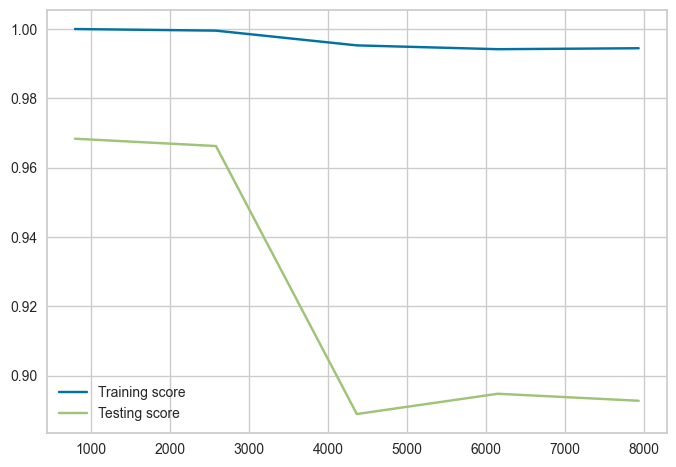

In [68]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

#Random Forest Model 

In [69]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

In [70]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2885
         1.0       0.82      0.61      0.70        92

    accuracy                           0.98      2977
   macro avg       0.91      0.80      0.85      2977
weighted avg       0.98      0.98      0.98      2977



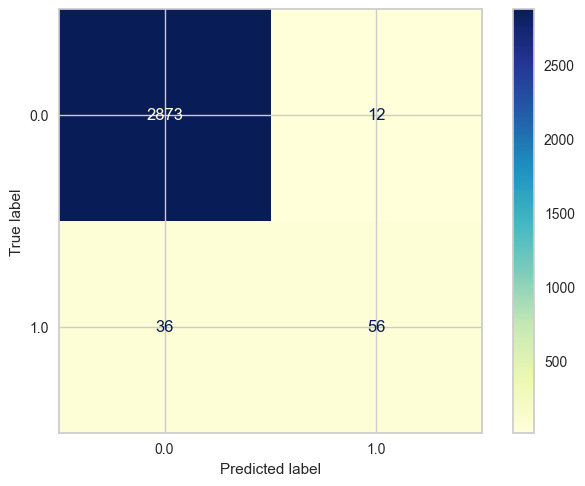

In [71]:
#Confuision Matrix for Random Forest 
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

# Graident Boosting Model 

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

In [73]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2885
         1.0       0.53      0.84      0.65        92

    accuracy                           0.97      2977
   macro avg       0.76      0.91      0.82      2977
weighted avg       0.98      0.97      0.97      2977



# k-NN(K-nearest nieghbors) Model 

{'n_neighbors': 2}


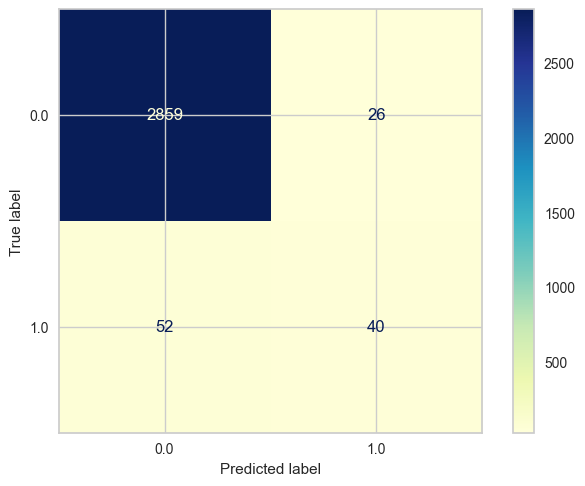

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [75]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2885
         1.0       0.61      0.43      0.51        92

    accuracy                           0.97      2977
   macro avg       0.79      0.71      0.75      2977
weighted avg       0.97      0.97      0.97      2977



# Gaussian Naive Bayes Model

In [76]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB().fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2885
         1.0       0.15      0.74      0.24        92

    accuracy                           0.86      2977
   macro avg       0.57      0.80      0.58      2977
weighted avg       0.96      0.86      0.90      2977



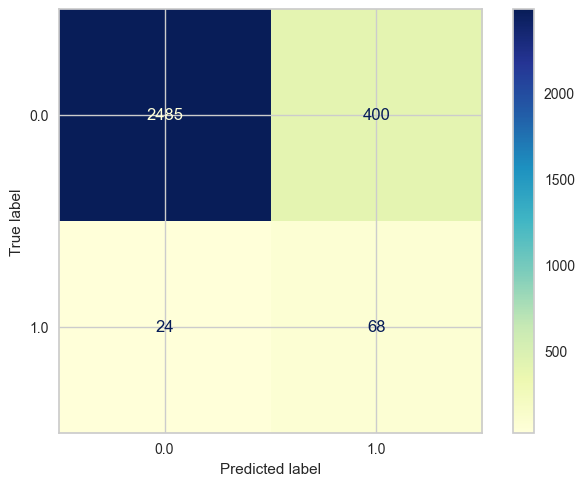

In [77]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

# MLP(Multi-layer Preceptron) Model 


In [78]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2885
         1.0       0.60      0.79      0.69        92

    accuracy                           0.98      2977
   macro avg       0.80      0.89      0.84      2977
weighted avg       0.98      0.98      0.98      2977



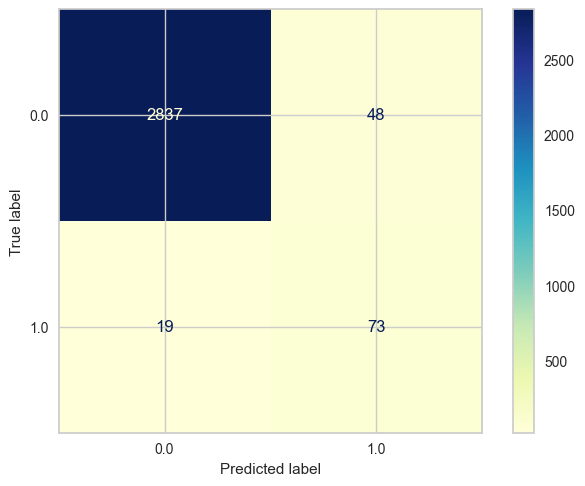

In [79]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

# Evaluation of all the models 
 All the models metrics will be compared side by side to determine which had the best overal perfomace for selection.  The model selected will then be deployed using pickle. Deployment will be at a later date. 

In [80]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.971784,0.977670,0.971784,0.974105,0.034916,0.001065
Random Forest,0.983876,0.982553,0.983876,0.982701,0.167700,0.014065
Gradient Boosting,0.971784,0.980260,0.971784,0.974851,0.935422,0.002403
k-NN,0.973799,0.970515,0.973799,0.971702,0.003341,0.046111
Gaussian Naive Bayes,0.857575,0.964317,0.857575,0.900425,0.001730,0.000442
Multi-layer Perceptron,0.977494,0.981294,0.977494,0.978969,6.385925,0.000967


In [81]:
# Graphical represantion of models 
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
model_performance.style.apply(highlight_max, props='color:white;background-color:darkblue;', axis=0)\
         .apply(highlight_max, props='color:white;background-color:red;', axis=1)\
         .apply(highlight_max, props='color:white;background-color:purple', axis=None)

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree,0.971784,0.977670,0.971784,0.974105,0.034916,0.001065
Random Forest,0.983876,0.982553,0.983876,0.982701,0.167700,0.014065
Gradient Boosting,0.971784,0.980260,0.971784,0.974851,0.935422,0.002403
k-NN,0.973799,0.970515,0.973799,0.971702,0.003341,0.046111
Gaussian Naive Bayes,0.857575,0.964317,0.857575,0.900425,0.001730,0.000442
Multi-layer Perceptron,0.977494,0.981294,0.977494,0.978969,6.385925,0.000967


# Results 
While several of the models employed in this project performed extremely well and many were for all purposes a "tie" in how they performed. The k-NN model looks to have just slightly out performed the other models.  This will be the model used in deplyoment 
## Future considerations
    This project only looked at few ways to handle and model this dataset. This study published on the NIH shows there are limitations to synthetic oversampling (https://pmc.ncbi.nlm.nih.gov/articles/PMC10789107/#:~:text=The%20oversampling%20techniques%20attempt%20to,for%20cancer%20patients%5B1%5D.) The findings of this study should that oversampling could lead to overfitting which then could lead to false predictions.  